# **Анализ целей обучения студентов Яндекс Практикума**

**Цель исследования** – предложить гипотезы по улучшению
выстраивания помощи студентам в достижении их целей.

**Задачи исследования исследования:**
* определить нормальные и найти аномальные показатели;
* определить коррелирующие параметры, построить портреты студентов,
сравнить их, чтобы выделить значимые закономерности;
* сегментировать студентов (по 2м и более показателям), выявить
особенности сегментов;
* сформулировать на основе данных гипотезы по улучшению
выстраивания помощи студентам в достижении их целей;
* оформить выводы и гипотезы аналитиков с помощью инструментов
фигмы для презентации руководству Яндекс Практикума.

**План работы**

1. Ознакомимся с данными и изучим общую информацию.
2. Выполним предобработку данных и подготовим данные к анализу.
3. Проведем анализ данных. Ответим на основные вопросы.
4. Построим портреты пользователей.
5. Сделаем общие выводы и сформулируем рекомендации для бизнеса.

**Описание данных**

data_goals_answers

* `question_title` — текст вопроса
* `question_type` — тип вопроса
* `user_id` — уникальный id пользователя
* `user_answer` — ответ пользователя на вопрос
* `answer_date` — время ответа
* `answer_id` — id ответа
* `cohort, current_cohort` — начальная и текущая когорта студента
* `course_name, topic_name, lesson_name` — курс, тема и урок, на котором студент отвечает на вопрос
   У нас значения должны быть Трудоустройство-Трудоустройство-Цель обучения, т.к. мы изучаем именно это
* `original_segment, current_segment` — b2c/b2b/b2g — из какого сегмента был/стал студент — сам является клиентом, его обучение оплачивается бизнесом или государством
* `profession_name` — код профессии
* `statement_content` — формулировка вопроса об уверенности в знаниях
* `slide_position` — страница опроса (не нужно для анализа)

hackathon_metrics

* `profession_name` — код профессии
* `user_id` — уникальный id пользователя
* `lp_avg_user` — средний learning performance
   Первые, более высокие значения в таблице с фри-трека, последние с курса, наиболее актуально находящееся в таблице ниже
* `question_title` — текст вопроса
* `user_answer` — ответ пользователя на вопрос
* `statement_content` — формулировка вопроса об уверенности в знаниях
* `value` — ответ на вопрос об уверенности в знаниях для расчёта learning experience индекса

# **1. Ознакомимся с данными и изучим общую информацию**

In [1]:
import pandas as pd
import pprint as pp
from functools import reduce
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# настроим нашу тетрадку так, чтобы все графики были картинками (пригодится для pdf-формата)
%pip install -U kaleido -q
import plotly.io as pio
pio.renderers.default = "png"
from IPython.display import Image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.3 MB/s eta 0:00:00


In [2]:
# добавим опцию, которая позволит отобразить все столбцы
pd.set_option('display.max_columns', None)

**Введем функцию dataset_info() для вывода информации о данных**

* аргумент функции - анализируемый датасет
* выводим на экран:
 1. строки - полные дубликаты (если есть)
 2. названия колонок
 3. первые три строки данных
 4. информацию о данных: количество записей, количество колонок, количество заполненных ячеек по колонкам, типы данных в колонках, размер занимаемой памяти
 5. сводку о данных по колонкам, в которых находятся численные значения: среднее, стандартное отклонение, минимальное, нижний и верхний квартили, медиана, максимум.
 6. количество и долю ячеек без данных по колонкам

Вызов функции: dataset_info(df_name), где df_name - название датафрейма для анализа.

In [3]:
def dataset_info(data):
    print('\033[1m' + 'Строки - полные дубликаты:' + '\033[0m')
    display(data[data.duplicated(keep=False)])
    print('\033[1m' + 'Названия колонок:' + '\033[0m')
    print(data.columns)
    print()
    print('\033[1m' + 'Первые строки:' + '\033[0m')
    display(data.head(3))
    print('\033[1m' + 'Информация о датафрэйм:' + '\033[0m')
    display(data.info())
    print('\033[1m' + "describe" + '\033[0m')
    display(data.describe())
    print('\033[1m' + "Количества и доли отсутствующих значений" + '\033[0m')
    display(pd.concat([data.isna().sum(), data.isna().mean()], axis=1)\
    .rename(columns={0:'кол-во', 1:'доля'})\
    .style.format({'кол-во':'{:.0f}', 'доля':'{:.2%}'}))

In [8]:
answers.head()

,user_id,answer_date,answer_id,cohort,course_name,current_cohort,current_segment,lesson_name,original_segment,profession_name,question_title,question_type,slide_position,statement_content,topic_name,user_answer
1,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,Трудоустройство,data_cohort_121,b2g,Цель обучения,b2g,data-analyst,Для программы важно понять над чем вам нужно п...,checkbox,0,NaN,Трудоустройство,определение профессиональной сферы
2,3157,2023-09-01 10:43:00,4c9d62c8-beed-4cab-a48a-a7168dbf9fdf,data_cohort_121,Трудоустройство,data_cohort_121,b2g,Цель обучения,b2g,data-analyst,"Тут вы можете оставить свой комментарий, если ...",text,1,NaN,Трудоустройство,Все ок)
3,3157,2023-09-01 10:42:00,fe97eac2-5e16-4e28-9aab-83669b4c5629,data_cohort_121,Трудоустройство,data_cohort_121,b2g,Цель обучения,b2g,data-analyst,"Бывает, что во время обучения меняется его цел...",radio,0,NaN,Трудоустройство,Продвинуться по карьерной лестнице.
4,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,Трудоустройство,data_cohort_121,b2g,Цель обучения,b2g,data-analyst,Для программы важно понять над чем вам нужно п...,checkbox,0,NaN,Трудоустройство,персональная карьерная консультация
5,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,Трудоустройство,data_cohort_121,b2g,Цель обучения,b2g,data-analyst,Для программы важно понять над чем вам нужно п...,checkbox,0,NaN,Трудоустройство,устройство рынка труда


In [9]:
metrics.head()

,profession_name,user_id,lp_avg_user,statement_content,value,question_title,user_answer
0,sql-data-analyst,14641026,0.860000,Моя уверенность в своих знаниях значительно по...,2,"Какова вероятность, что вы порекомендуете Прак...",9.0
1,sql-data-analyst,14641026,0.930000,Моя уверенность в своих знаниях значительно по...,2,"Какова вероятность, что вы порекомендуете Прак...",9.0
2,data-analyst,14881168,0.480000,Моя уверенность в своих знаниях значительно по...,1,NaN,NaN
3,data-analyst,14881168,0.426667,Моя уверенность в своих знаниях значительно по...,1,NaN,NaN
4,data-scientist,7855703,0.611111,Моя уверенность в своих знаниях значительно по...,2,NaN,NaN


In [10]:
answers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43428 entries, 1 to 43428
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            43428 non-null  int64  
 1   answer_date        43428 non-null  object 
 2   answer_id          43428 non-null  object 
 3   cohort             43428 non-null  object 
 4   course_name        43428 non-null  object 
 5   current_cohort     43428 non-null  object 
 6   current_segment    43223 non-null  object 
 7   lesson_name        43428 non-null  object 
 8   original_segment   43223 non-null  object 
 9   profession_name    43428 non-null  object 
 10  question_title     43428 non-null  object 
 11  question_type      43428 non-null  object 
 12  slide_position     43428 non-null  int64  
 13  statement_content  0 non-null      float64
 14  topic_name         43428 non-null  object 
 15  user_answer        43416 non-null  object 
dtypes: float64(1), int64(2

Что изменим:
* формат данных в столбце answer_date на дату.

In [11]:
metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79117 entries, 0 to 79116
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   profession_name    79117 non-null  object 
 1   user_id            79117 non-null  int64  
 2   lp_avg_user        79117 non-null  float64
 3   statement_content  79117 non-null  object 
 4   value              79117 non-null  int64  
 5   question_title     14739 non-null  object 
 6   user_answer        14739 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.8+ MB


Что изменим:
* строки statement_content и question_title сделаем столбцами.

# **2. Выполним предобработку данных и подготовим данные к анализу**

In [12]:
# Изменим формат answer_date на дату
answers['answer_date'] = pd.to_datetime(answers['answer_date'],format='%Y-%m-%d %H:%M:%S')

In [13]:
answers.dtypes

user_id                       int64
answer_date          datetime64[ns]
answer_id                    object
cohort                       object
course_name                  object
current_cohort               object
current_segment              object
lesson_name                  object
original_segment             object
profession_name              object
question_title               object
question_type                object
slide_position                int64
statement_content           float64
topic_name                   object
user_answer                  object
dtype: object

In [14]:
# для удобства создадим копии датафреймов: filtered_metrics и filtered_answers
filtered_metrics = metrics.copy()
filtered_answers = answers.copy()

**Проверим данные на пропуски**

In [15]:
# проверяем датафрейм filtered_answers
filtered_answers.isna().sum()

user_id                  0
answer_date              0
answer_id                0
cohort                   0
course_name              0
current_cohort           0
current_segment        205
lesson_name              0
original_segment       205
profession_name          0
question_title           0
question_type            0
slide_position           0
statement_content    43428
topic_name               0
user_answer             12
dtype: int64

**В таблице filtered_answers есть пропуски:**
* current_segment - 205
* original_segment - 205

Количество пропусков в этих столбцах совпадает. Скорее всего эти пропуски у одних и тех же пользователей. Наличие пропусков в этих столбцах будут мешать нам в проведении исследования. Потеря этих данных будет несущественной (менее 1%), мы их удалим.

* statement_content - пропущены все строки, т.к. в данной таблице изначально не было данных по этому столбцу, его можно удалить
* user_answer - 12

Количество пропусков в данном столбце небольшое, но мы оставим их без удаления, так как при анализе, возможно, нам будет интересно рассмотреть пользователей, которые не дали ответ на вопрос.

In [16]:
# удалим строки с пропусками в столбце current_segment
filtered_answers = filtered_answers.dropna(subset=['current_segment'])
filtered_answers.isna().sum()

user_id                  0
answer_date              0
answer_id                0
cohort                   0
course_name              0
current_cohort           0
current_segment          0
lesson_name              0
original_segment         0
profession_name          0
question_title           0
question_type            0
slide_position           0
statement_content    43223
topic_name               0
user_answer             12
dtype: int64

In [17]:
print('Было строк до очистки:', answers.shape[0])
print('Cтало строк после очистки:', filtered_answers.shape[0])
print('Процент потерь:', (filtered_answers.shape[0]/answers.shape[0]))

Было строк до очистки: 43428
Cтало строк после очистки: 43223
Процент потерь: 0.9952795431518836


Удалив строки с пропусками в столбце current_segment, мы автоматически избавились от пропусков в original_segment. Потери незначительные – меньше 1%.

In [18]:
# проверяем датафрейм filtered_metrics
filtered_metrics.isna().sum()

profession_name          0
user_id                  0
lp_avg_user              0
statement_content        0
value                    0
question_title       64378
user_answer          64378
dtype: int64

В таблице metrics равное количество пропусков в столбцах question_title и user_answer. Это может говорить о том, что не после каждого спринта задавался такой вопрос студентам. Пропуски мы позже заполним маркером, который будет нам наглядно показывать отсутствие вопроса.

**Проверим данные на дубликаты**

In [19]:
filtered_answers.duplicated().sum()

0

In [20]:
filtered_metrics.duplicated().sum()

41817

**Посмотрим строки-дубликаты в таблице filtered_metrics**

In [21]:
filtered_metrics[filtered_metrics.duplicated()].head(20)

,profession_name,user_id,lp_avg_user,statement_content,value,question_title,user_answer
6,data-scientist,7855703,0.611111,Моя уверенность в своих знаниях значительно по...,2,NaN,NaN
7,data-scientist,7855703,0.611111,Моя уверенность в своих знаниях значительно по...,2,NaN,NaN
8,data-scientist,7855703,0.611111,Моя уверенность в своих знаниях значительно по...,2,NaN,NaN
9,data-scientist,7855703,0.611111,Моя уверенность в своих знаниях значительно по...,1,NaN,NaN
10,data-scientist,7855703,0.611111,Моя уверенность в своих знаниях значительно по...,2,NaN,NaN
13,data-scientist,7855703,0.660000,Моя уверенность в своих знаниях значительно по...,2,NaN,NaN
14,data-scientist,7855703,0.660000,Моя уверенность в своих знаниях значительно по...,2,NaN,NaN
15,data-scientist,7855703,0.660000,Моя уверенность в своих знаниях значительно по...,2,NaN,NaN
16,data-scientist,7855703,0.660000,Моя уверенность в своих знаниях значительно по...,1,NaN,NaN
17,data-scientist,7855703,0.660000,Моя уверенность в своих знаниях значительно по...,2,NaN,NaN


**Вывод:**
1. В датафрейме filtered_answers дубликатов нет.
2. В датафрейме filtered_metrics дубликаты есть. Это произошло из-за того, что таблицу с данными не попал столбец даты/времени. Заказчик пояснил, что один и тот же пользователь неоднократно отвечал на эти вопросы в разное время. Таким образом, это **не дубликаты**, а схожие ответы на вопросы.

**Проверим, что курс, тема и урок, на котором студент отвечает на вопрос – Трудоустройство, Трудоустройство и Цель обучения.**

In [22]:
cols_to_watch = ['course_name', 'topic_name', 'lesson_name']
for col in cols_to_watch: display(filtered_answers[col].value_counts())

Трудоустройство    43223
Name: course_name, dtype: int64

Трудоустройство    43223
Name: topic_name, dtype: int64

Цель обучения    43223
Name: lesson_name, dtype: int64

Всё верно, лишних данных у нас нет.
В таком случае, мы считаем целесообразным удалить эти столбцы из датафрейма для удобства.

Также удалим пустой столбец statement_content, который в последствии будет добавлен при слиянии таблиц filtered_answers и filtered_metrics, и столбец slide_position, который для анализа нам не пригодится.

In [23]:
filtered_answers = filtered_answers.drop(columns=['course_name', 'topic_name', 'lesson_name', 'statement_content', 'slide_position'])
filtered_answers.head()

,user_id,answer_date,answer_id,cohort,current_cohort,current_segment,original_segment,profession_name,question_title,question_type,user_answer
1,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,Для программы важно понять над чем вам нужно п...,checkbox,определение профессиональной сферы
2,3157,2023-09-01 10:43:00,4c9d62c8-beed-4cab-a48a-a7168dbf9fdf,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,"Тут вы можете оставить свой комментарий, если ...",text,Все ок)
3,3157,2023-09-01 10:42:00,fe97eac2-5e16-4e28-9aab-83669b4c5629,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,"Бывает, что во время обучения меняется его цел...",radio,Продвинуться по карьерной лестнице.
4,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,Для программы важно понять над чем вам нужно п...,checkbox,персональная карьерная консультация
5,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,Для программы важно понять над чем вам нужно п...,checkbox,устройство рынка труда


**Изменим формат таблицы metrics**

**Рассмотрим столбцы statement_content и value**

In [24]:
filtered_metrics.head()

,profession_name,user_id,lp_avg_user,statement_content,value,question_title,user_answer
0,sql-data-analyst,14641026,0.860000,Моя уверенность в своих знаниях значительно по...,2,"Какова вероятность, что вы порекомендуете Прак...",9.0
1,sql-data-analyst,14641026,0.930000,Моя уверенность в своих знаниях значительно по...,2,"Какова вероятность, что вы порекомендуете Прак...",9.0
2,data-analyst,14881168,0.480000,Моя уверенность в своих знаниях значительно по...,1,NaN,NaN
3,data-analyst,14881168,0.426667,Моя уверенность в своих знаниях значительно по...,1,NaN,NaN
4,data-scientist,7855703,0.611111,Моя уверенность в своих знаниях значительно по...,2,NaN,NaN


In [25]:
# посмотрим, какие значения встречаются в строках
filtered_metrics['statement_content'].value_counts()

Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом    79117
Name: statement_content, dtype: int64

Значения в строках полностью совпадают. Обучающимся задавали вопрос о повышении уверенности в знаниях по сравнению с предыдущим спринтом, а им в свою очередь нужно было дать оценку. Значит, мы можем столбец value переименовать в confidence_value, а столбец statement_content удалить.

In [26]:
filtered_metrics = filtered_metrics.drop(columns='statement_content').rename(columns={'value':'confidence_value'})
filtered_metrics.head()

,profession_name,user_id,lp_avg_user,confidence_value,question_title,user_answer
0,sql-data-analyst,14641026,0.860000,2,"Какова вероятность, что вы порекомендуете Прак...",9.0
1,sql-data-analyst,14641026,0.930000,2,"Какова вероятность, что вы порекомендуете Прак...",9.0
2,data-analyst,14881168,0.480000,1,NaN,NaN
3,data-analyst,14881168,0.426667,1,NaN,NaN
4,data-scientist,7855703,0.611111,2,NaN,NaN


**Рассмотрим столбцы question_title и user_answer**

In [27]:
# посмотрим на строки в столбце question_title
filtered_metrics['question_title'].value_counts()

Какова вероятность, что вы порекомендуете Практикум своим друзьям по шкале от 0 до 10, где 10 — обязательно порекомендую, 0 — не порекомендую ни за что?    14739
Name: question_title, dtype: int64

В данных много пропусков в столбцах question_title и user_answer. Это может говорить о том, что не после каждого спринта студентам предлагали ответить на этот вопрос "Какова вероятность, что вы порекомендуете Практикум своим друзьям по шкале от 0 до 10, где 10 — обязательно порекомендую, 0 — не порекомендую ни за что?".

Переименуем столбец user_answer на nps (Net Promoter Score, индекс потребительской лояльности, показатель приверженности потребителей товару или компании), а столбец question_title удалим.

In [28]:
filtered_metrics = filtered_metrics.drop(columns='question_title').rename(columns={'user_answer':'nps'})
filtered_metrics.head()

,profession_name,user_id,lp_avg_user,confidence_value,nps
0,sql-data-analyst,14641026,0.860000,2,9.0
1,sql-data-analyst,14641026,0.930000,2,9.0
2,data-analyst,14881168,0.480000,1,NaN
3,data-analyst,14881168,0.426667,1,NaN
4,data-scientist,7855703,0.611111,2,NaN


На место пропущенных значений в столбце nps поставим для удобства маркеры, которые будут нам сигнализировать о том, что вопрос не задавался и ответа на него не было.

In [29]:
filtered_metrics['nps'] = filtered_metrics['nps'].fillna(-1)

In [30]:
# посмотрим на готовую таблицу метрик
filtered_metrics.head()

,profession_name,user_id,lp_avg_user,confidence_value,nps
0,sql-data-analyst,14641026,0.860000,2,9.0
1,sql-data-analyst,14641026,0.930000,2,9.0
2,data-analyst,14881168,0.480000,1,-1.0
3,data-analyst,14881168,0.426667,1,-1.0
4,data-scientist,7855703,0.611111,2,-1.0


In [31]:
# проверим вновь на пропуски
filtered_metrics.isna().sum()

profession_name     0
user_id             0
lp_avg_user         0
confidence_value    0
nps                 0
dtype: int64

**Проверим filtered_metrics на аномальные значения в confidence_value и nps**

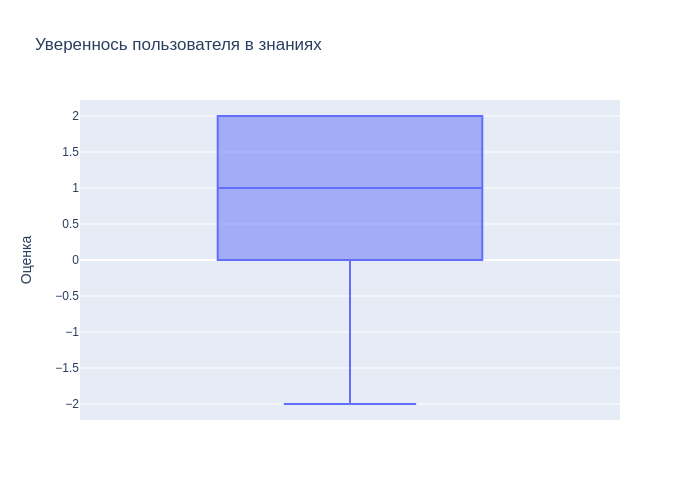

In [32]:
# проверим данные на аномалии в confidence_value
fig = px.box(filtered_metrics, y="confidence_value", title='Увереннось пользователя в знаниях',\
             labels={'confidence_value': 'Оценка'})
fig.show()

Аномальных значений в оценках пользователей своих знаний нет – они распределены в заланных границах от -2 до 2. Медианная оценка – 1.

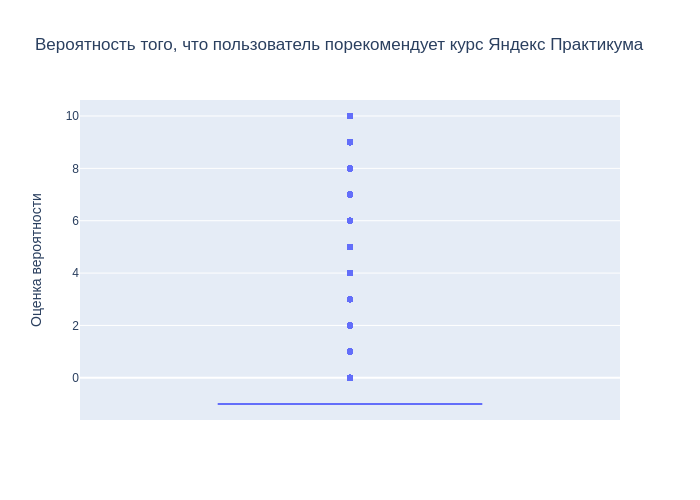

In [33]:
# проверим данные на аномалии в nps
fig = px.box(filtered_metrics, y="nps", title='Вероятность того, что пользователь порекомендует курс Яндекс Практикума',\
             labels={'nps': 'Оценка вероятности'})
fig.show()

Аномальных значений в столбце nps не обнаружено. Оценки выставлялись в диапазоне от 0 до 10. Значения "-1" сигнализируют нам о пропусках в данных из-за того, что этот вопрос задавался студентам не регулярно.

**Усредним значения в столбце confidence_value и в столбце lp_avg_user возьмем только последнюю (нижнюю) оценку**

In [34]:
mean_last_score = filtered_metrics.sort_values(by=['lp_avg_user'], ascending=False)\
                                  .groupby(['user_id'])\
                                  .agg({'lp_avg_user':'last', 'confidence_value': 'mean'})\
                                  .reset_index()
mean_last_score

,user_id,lp_avg_user,confidence_value
0,377,0.794000,1.333333
1,774,0.666000,0.000000
2,802,0.773333,0.000000
3,1282,0.570000,0.500000
4,1400,0.727143,0.250000
...,...,...,...
9792,16098368,0.722500,0.000000
9793,16098455,0.687500,0.000000
9794,16099590,0.806000,1.000000
9795,16100018,0.635000,0.000000


In [35]:
mean_last_score['user_id'].nunique()

9797

**Соберем таблицу filtered_metrics после изменений: теперь в ней только последняя оценка успеваемомти студента и усредненная оценка уверенности в своих знаниях в сравнении с предыдущим спринтом**

In [36]:
# удалим столбцы с сырыми данными
filtered_metrics = filtered_metrics.drop(columns=['lp_avg_user', 'confidence_value'])

# присоединим столбцы с готовыми данными
filtered_metrics = pd.merge(filtered_metrics, mean_last_score, on='user_id', how='outer')

filtered_metrics

,profession_name,user_id,nps,lp_avg_user,confidence_value
0,sql-data-analyst,14641026,9.0,0.860000,2.000000
1,sql-data-analyst,14641026,9.0,0.860000,2.000000
2,data-analyst,14881168,-1.0,0.426667,1.000000
3,data-analyst,14881168,-1.0,0.426667,1.000000
4,data-scientist,7855703,-1.0,0.611111,1.714286
...,...,...,...,...,...
79112,systems-analyst,14946989,-1.0,0.845000,1.000000
79113,systems-analyst,14946989,-1.0,0.845000,1.000000
79114,data-scientist,14258115,-1.0,0.750000,2.000000
79115,data-analyst,2927949,-1.0,0.710000,-1.500000


**Посмотрим, какие вопросы и ответы есть в таблице filtered_answers**

In [37]:
# смотрим, какие есть вопросы-ответы
for q in filtered_answers.question_title.value_counts().index:
    val_c = filtered_answers.query('question_title == @q')['user_answer'].value_counts()
    pp.pprint(q)
    if len(val_c) < 20:
        display(val_c)
        print(len(val_c),'\n','─'*20,'\n')

('Для программы важно понять над чем вам нужно поработать. Не переживайте, вам '
 'будут доступны все опции.')


резюме                                         2679
оформление портфолио                           2595
прохождение собеседований                      2578
решение тестовых заданий                       2429
сопроводительное письмо                        2426
определение стратегии поиска работы            2304
оценка шансов на трудоустройство               2241
персональная карьерная консультация            1946
устройство рынка труда                         1742
как и куда можно расти как специалисту         1725
определение профессиональной сферы             1652
как говорить про повышение                     1230
не думаю, что вы можете мне с чем-то помочь     189
Name: user_answer, dtype: int64

13 
 ──────────────────── 

('В зависимости от опыта работы вам может понадобиться разный вид консультаций '
 'и помощи от команды сопровождения и трудоустройства. Для нас очень важен '
 'честный ответ и понимание вашего бэкграунда.')


Нет опыта работы в IT и в направлении Анализа данных.     2240
От 1 года опыта работы в другом направлении IT.            494
От 1 до 3 лет опыта работы направлении Анализа данных.     176
Более 3 лет опыта работы в направлении Анализа данных.     154
Менее 1 года опыта работы в другом направлении IT.         141
Менее года опыта работы в направлении Анализа данных.      126
Нет опыта работы аналитиком и в IT.                         83
От 1 до 3 лет опыта работы аналитиком.                      48
Более 3 лет опыта работы аналитиком.                        27
Менее года опыта работы аналитиком.                         27
Нет опыта работы аналитиков и в IT.                         17
Name: user_answer, dtype: int64

11 
 ──────────────────── 

('Бывает, что во время обучения меняется его цель. Например, изначально вы не '
 'планировали менять работу, но влюбились в профессию. Может, произошли '
 'жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как '
 'помочь, отметьте подходящее утверждение:')


Сменить работу.                                    2301
Получить новые навыки для общего развития.          372
Получить новые знания, чтобы повысить зарплату.     346
Продвинуться по карьерной лестнице.                 215
Структурировать уже полученные навыки и знания.     172
Нет определённой цели в обучении.                    61
Развить свой бизнес.                                 40
Name: user_answer, dtype: int64

7 
 ──────────────────── 

'Планируете ли вы записаться на Карьерный Трек?'


Да, планирую записаться после диплома    1930
Да, уже записался                        1286
Нет, не планирую                          291
Name: user_answer, dtype: int64

3 
 ──────────────────── 

('Тут вы можете оставить свой комментарий, если не нашли подходящего варианта '
 'ответа.')
'Возможно вы нашли работу за время обучения?'


Нет                  2700
В активном поиске     568
Да                    202
Name: user_answer, dtype: int64

3 
 ──────────────────── 



**Для удобства работы преобразуем таблицу с ответами: переведем таблицу filtered_answers из длинной в широкую**

**Порядок вопросов в форме:**
1. Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции. **Формат вопроса: checkbox**, можно выбрать от 1 до 7 ответов.
2. Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа. **Формат вопроса: text**, можно добавить текстовый комментарий.
3. Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение: **Формат вопроса: radio**, можно выбрать один вариант ответа.
4. Возможно вы нашли работу за время обучения? **Формат вопроса: radio**, можно выбрать один вариант ответа.
5. В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда. **Формат вопроса: radio**, можно выбрать один вариант ответа.
6. Планируете ли вы записаться на Карьерный Трек? **Формат вопроса: radio**, можно выбрать один вариант ответа.

In [38]:
# соберем в список уникальные формулировки вопросов
unique_questions = filtered_answers['question_title'].unique().tolist()
unique_questions

['Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.',
 'Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.',
 'Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:',
 'Возможно вы нашли работу за время обучения?',
 'В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.',
 'Планируете ли вы записаться на Карьерный Трек?']

In [39]:
# создаем словарь из вопросов для замены
questions_change_dict = {}

In [40]:
# делаем словарь
# для каждого вопроса задаем вариант, на который его надо заменить (q1 - q6)

for idx, question in enumerate(unique_questions):
    questions_change_dict[question] = 'q' + str(idx + 1)

questions_change_dict

{'Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.': 'q1',
 'Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.': 'q2',
 'Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:': 'q3',
 'Возможно вы нашли работу за время обучения?': 'q4',
 'В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.': 'q5',
 'Планируете ли вы записаться на Карьерный Трек?': 'q6'}

In [41]:
# делаем замену по словарю и смотрим, что получилось
filtered_answers['question_title'] = filtered_answers['question_title'].map(questions_change_dict)

filtered_answers.head()

,user_id,answer_date,answer_id,cohort,current_cohort,current_segment,original_segment,profession_name,question_title,question_type,user_answer
1,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,q1,checkbox,определение профессиональной сферы
2,3157,2023-09-01 10:43:00,4c9d62c8-beed-4cab-a48a-a7168dbf9fdf,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,q2,text,Все ок)
3,3157,2023-09-01 10:42:00,fe97eac2-5e16-4e28-9aab-83669b4c5629,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,q3,radio,Продвинуться по карьерной лестнице.
4,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,q1,checkbox,персональная карьерная консультация
5,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,q1,checkbox,устройство рынка труда


In [48]:
filtered_answers.groupby('question_title').agg({'user_answer':'count'})

,user_answer
question_title,
q1,25736
q2,3458
q3,3507
q4,3470
q5,3533
q6,3507


**Проверим, что в каждом answer_id только один раз встречается ответ на вопрос типа radio**

In [49]:
# проверим, что в каждом answer_id только один раз встречается ответ на вопрос типа radio для q3
(
filtered_answers[(filtered_answers['question_type']=='radio')&(filtered_answers['question_title']=='q3')]
.groupby('answer_id')[['user_answer']]
.count().sort_values('user_answer', ascending=False)
)

,user_answer
answer_id,
0013f406-ec8b-4260-afef-aa4a50081205,1
acd6d7e9-0f63-4b92-ad4f-241080960e2d,1
ac70c210-8e04-4119-a810-e1652cc42f2e,1
ac7b77a3-ba61-4994-9ac6-658939e86313,1
ac8dda84-e2c1-43de-867c-852b515e3e75,1
...,...
583e707e-1c1c-42b3-ac94-af0be9432c1a,1
5867ea36-82cd-4201-85e6-cd5506f5163e,1
586cffcd-1a6e-4688-af48-51c4450133c2,1


In [50]:
# проверим, что в каждом answer_id только один раз встречается ответ на вопрос типа radio для q4
(
filtered_answers[(filtered_answers['question_type']=='radio')&(filtered_answers['question_title']=='q4')]
.groupby('answer_id')[['user_answer']]
.count().sort_values('user_answer', ascending=False)
)

,user_answer
answer_id,
0007ce91-47f5-4513-8e8d-9c6745a4d8a7,1
a9774453-a287-46c6-a24e-15155d156934,1
a88f19c3-468a-4cf0-9208-4169b800aa28,1
a8973521-7755-49e7-b0ba-d3b283813c2d,1
a8b5afdf-f448-4c9d-a9fd-c64405c39fa9,1
...,...
56431158-fb44-45cd-8b53-6fedfefda952,1
5649355d-7f2d-4190-ba80-8c71a25bf9b8,1
5653b594-92a4-4fd6-affa-5395f9be0648,1


In [51]:
# проверим, что в каждом answer_id только один раз встречается ответ на вопрос типа radio для q5
(
filtered_answers[(filtered_answers['question_type']=='radio')&(filtered_answers['question_title']=='q5')]
.groupby('answer_id')[['user_answer']]
.count().sort_values('user_answer', ascending=False)
)

,user_answer
answer_id,
0002d7c4-36c2-4484-b922-8dda2e8749c6,1
ab8174e7-f6f4-4700-ad70-b72f6e41b6c2,1
aafb59ff-80c5-4f08-a0b8-4b5cb278e7e9,1
ab02faf0-e7f3-4d83-955f-5eff45eb6c1b,1
ab075bca-d001-4b7e-a5bc-e9b647d5fb98,1
...,...
565cb004-9053-456d-b1c3-f69e1686474a,1
566b7325-8d7c-483c-82f1-f7696fb1cde4,1
5679702a-ed46-4efe-8022-e66b0549534d,1


In [52]:
# проверим, что в каждом answer_id только один раз встречается ответ на вопрос типа radio для q6
(
filtered_answers[(filtered_answers['question_type']=='radio')&(filtered_answers['question_title']=='q6')]
.groupby('answer_id')[['user_answer']]
.count().sort_values('user_answer', ascending=False)
)

,user_answer
answer_id,
0013f406-ec8b-4260-afef-aa4a50081205,1
acd6d7e9-0f63-4b92-ad4f-241080960e2d,1
ac70c210-8e04-4119-a810-e1652cc42f2e,1
ac7b77a3-ba61-4994-9ac6-658939e86313,1
ac8dda84-e2c1-43de-867c-852b515e3e75,1
...,...
583e707e-1c1c-42b3-ac94-af0be9432c1a,1
5867ea36-82cd-4201-85e6-cd5506f5163e,1
586cffcd-1a6e-4688-af48-51c4450133c2,1


Проверка прошла успешно.

**Проверим уникальные значения в столбце с вопросом - q5**

**Изменим формат таблицы: перенесем вопросы в названия столбцов**\
Это нам будет необходимо для проведения дальнейшего анализа.

In [53]:
# добавление столбцов q1 - q6

# создаем новую таблицу с ответами на вопросы
pivot_table = pd.pivot_table(
    filtered_answers,
    values='user_answer',
    index=['user_id', 'cohort', 'current_cohort', 'current_segment', 'original_segment', 'profession_name'],
    columns='question_title',
    aggfunc=lambda x: ' '.join(str(v) for v in x)  # объединяем дублирующиеся значения
).reset_index()

display(pivot_table)


question_title,user_id,cohort,current_cohort,current_segment,original_segment,profession_name,q1,q2,q3,q4,q5,q6
0,3157,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,определение профессиональной сферы персональна...,Все ок),Продвинуться по карьерной лестнице.,Да,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома"
1,5415,data_cohort_117,data_cohort_119,b2g,b2g,data-analyst,оценка шансов на трудоустройство устройство ры...,,Сменить работу.,Нет,От 1 года опыта работы в другом направлении IT.,"Да, планирую записаться после диплома"
2,8199,data_cohort_103,data_cohort_103,b2c,b2c,data-analyst,определение стратегии поиска работы персональн...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, уже записался"
3,8215,ds_cohort_101,ds_cohort_101,b2c,b2c,data-scientist,как говорить про повышение решение тестовых за...,Чувствую себя неуверенно во многих вопросах. П...,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома"
4,10202,data_analyst_plus_cohort_31,data_analyst_plus_cohort_31,b2g,b2g,data-analyst-plus,оформление портфолио сопроводительное письмо к...,Спасибо,Развить свой бизнес.,Нет,Более 3 лет опыта работы в направлении Анализа...,"Да, уже записался"
...,...,...,...,...,...,...,...,...,...,...,...,...
3527,16224921,sql-data-analyst_cohort_205,sql-data-analyst_cohort_205,b2c,b2c,sql-data-analyst,решение тестовых заданий оформление портфолио ...,"Хочу получить больше знаний, прежде чем менять...",Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Нет, не планирую"
3528,16230604,sql-data-analyst_cohort_207,sql-data-analyst_cohort_207,b2c,b2c,sql-data-analyst,"не думаю, что вы можете мне с чем-то помочь",,Получить новые навыки для общего развития.,Да,Менее года опыта работы в направлении Анализа ...,"Нет, не планирую"
3529,16271708,sql-data-analyst_cohort_213,sql-data-analyst_cohort_213,b2c,b2c,sql-data-analyst,устройство рынка труда оформление портфолио пе...,Не берут без опыта работы,Сменить работу.,В активном поиске,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома"
3530,16501153,data_cohort_1231,data_cohort_1231,b2c,b2c,data-analyst,оформление портфолио резюме определение страте...,\n,Развить свой бизнес.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома"


In [54]:
pivot_table.q5.unique()

array(['Нет опыта работы в IT и в направлении Анализа данных.',
       'От 1 года опыта работы в другом направлении IT.',
       'Более 3 лет опыта работы в направлении Анализа данных.',
       'Более 3 лет опыта работы аналитиком.',
       'От 1 до 3 лет опыта работы направлении Анализа данных.',
       'Менее 1 года опыта работы в другом направлении IT.',
       'От 1 до 3 лет опыта работы аналитиком.',
       'Нет опыта работы аналитиком и в IT.',
       'Менее года опыта работы в направлении Анализа данных.',
       'Нет опыта работы аналитиков и в IT.',
       'Менее года опыта работы аналитиком.',
       'От 1 года опыта работы в другом направлении IT. От 1 года опыта работы в другом направлении IT.'],
      dtype=object)

В ответах на вопрос про опыт работы есть дубликаты. Избавимся от дубликатов и заменим значения:

1. 'Нет опыта работы аналитиком и в IT.', 'Нет опыта работы аналитиков и в IT.' = 'Нет опыта работы в IT и в направлении Анализа данных.'

2. 'Менее года опыта работы аналитиком.' = 'Менее года опыта работы в направлении Анализа данных.'

3. 'От 1 до 3 лет опыта работы аналитиком.' = 'От 1 до 3 лет опыта работы направлении Анализа данных.'

4. 'Более 3 лет опыта работы аналитиком.' = 'Более 3 лет опыта работы в направлении Анализа данных.'

5. 'Менее 1 года опыта работы в другом направлении IT.'

6. 'От 1 года опыта работы в другом направлении IT. От 1 года опыта работы в другом направлении IT.' = 'От 1 года опыта работы в другом направлении IT.'

In [55]:
# меняем ответы
pivot_table['q5'] = pivot_table['q5'].replace("Нет опыта работы аналитиком и в IT.", "Нет опыта работы в IT и в направлении Анализа данных.", inplace=False)
pivot_table['q5'] = pivot_table['q5'].replace("Нет опыта работы аналитиков и в IT.", "Нет опыта работы в IT и в направлении Анализа данных.", inplace=False)
pivot_table['q5'] = pivot_table['q5'].replace("Менее года опыта работы аналитиком.", "Менее года опыта работы в направлении Анализа данных.", inplace=False)
pivot_table['q5'] = pivot_table['q5'].replace("От 1 до 3 лет опыта работы аналитиком.", "От 1 до 3 лет опыта работы направлении Анализа данных.", inplace=False)
pivot_table['q5'] = pivot_table['q5'].replace("Более 3 лет опыта работы аналитиком.", "Более 3 лет опыта работы в направлении Анализа данных.", inplace=False)
pivot_table['q5'] = pivot_table['q5'].replace("От 1 года опыта работы в другом направлении IT. От 1 года опыта работы в другом направлении IT.", "От 1 года опыта работы в другом направлении IT.", inplace=False)

In [56]:
pivot_table.q5.unique()

array(['Нет опыта работы в IT и в направлении Анализа данных.',
       'От 1 года опыта работы в другом направлении IT.',
       'Более 3 лет опыта работы в направлении Анализа данных.',
       'От 1 до 3 лет опыта работы направлении Анализа данных.',
       'Менее 1 года опыта работы в другом направлении IT.',
       'Менее года опыта работы в направлении Анализа данных.'],
      dtype=object)

**Соберем итоговую таблицу – df**\
Для этого мы объединим две таблицы: filtered_metrics и pivot_table.

In [57]:
# объединяем таблицы по user_id
df = pd.merge(filtered_metrics, pivot_table, on='user_id', how='outer')

# чистим таблицу от строк с пропущенными значениями
df = df.dropna()
df


,profession_name_x,user_id,nps,lp_avg_user,confidence_value,cohort,current_cohort,current_segment,original_segment,profession_name_y,q1,q2,q3,q4,q5,q6
4,data-scientist,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома"
5,data-scientist,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома"
6,data-scientist,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома"
7,data-scientist,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома"
8,data-scientist,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79300,systems-analyst,12903977,-1.0,0.750000,0.666667,systems_analyst_cohort_5,systems_analyst_cohort_11,b2c,b2c,systems-analyst,резюме определение профессиональной сферы устр...,На данном этапе хотела бы найти оплачиваемую с...,Продвинуться по карьерной лестнице.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, уже записался"
79308,systems-analyst,14946989,-1.0,0.845000,1.000000,systems_analyst_cohort_5,systems_analyst_cohort_5,b2c,b2c,systems-analyst,резюме решение тестовых заданий определение ст...,,Получить новые навыки для общего развития.,Да,Менее 1 года опыта работы в другом направлении...,"Да, планирую записаться после диплома"
79309,systems-analyst,14946989,-1.0,0.845000,1.000000,systems_analyst_cohort_5,systems_analyst_cohort_5,b2c,b2c,systems-analyst,резюме решение тестовых заданий определение ст...,,Получить новые навыки для общего развития.,Да,Менее 1 года опыта работы в другом направлении...,"Да, планирую записаться после диплома"
79310,systems-analyst,14946989,-1.0,0.845000,1.000000,systems_analyst_cohort_5,systems_analyst_cohort_5,b2c,b2c,systems-analyst,резюме решение тестовых заданий определение ст...,,Получить новые навыки для общего развития.,Да,Менее 1 года опыта работы в другом направлении...,"Да, планирую записаться после диплома"


In [58]:
df = df.drop(columns=['profession_name_x'])
df.rename(columns = {'profession_name_y':'profession_name'}, inplace = True)

In [59]:
df.head(1)

,user_id,nps,lp_avg_user,confidence_value,cohort,current_cohort,current_segment,original_segment,profession_name,q1,q2,q3,q4,q5,q6
4,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома"


In [60]:
# посмотрим на количество уникальных юзеров с полными данными
df['user_id'].nunique()

3104

**Добавим дополнительные столбцы в нашу таблицу, которые будут нам необходимы для дальнейшего исследования**

Так как основная задача нашего исследования состоит в рассмотрении целей обучения студентов для выдвижения гипотез по достижению этих целей, мы будем **рассматривать более подробно ответы студентов на вопрос q3**: "Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:"*

In [61]:
# посмотрим, какие ответы вообще есть в этом столбце
df['q3'].value_counts()

Сменить работу.                                    23578
Получить новые навыки для общего развития.          3337
Получить новые знания, чтобы повысить зарплату.     3134
Продвинуться по карьерной лестнице.                 1699
Структурировать уже полученные навыки и знания.     1567
Нет определённой цели в обучении.                    523
Развить свой бизнес.                                 409
Сменить работу. Сменить работу.                       10
Name: q3, dtype: int64

В данных замечен ответ "Сменить работу. Сменить работу." – это неявный дубликат ответа "Сменить работу", который мог возникнуть во время выгрузки данных. Изменим эти ответы просто на "Сменить работу."

In [62]:
# меняем ответы "Сменить работу. Сменить работу." на "Сменить работу."
df['q3'] = df['q3'].replace("Сменить работу. Сменить работу.", "Сменить работу.", inplace=False)

In [63]:
# считаем количество всех ответов в столбце q3 и сортируем их по убыванию
q3_counts = df["q3"].value_counts(ascending=False)

# выводим результаты
print("Количество ответов в порядке убывания популярности:")
print(q3_counts)

Количество ответов в порядке убывания популярности:
Сменить работу.                                    23588
Получить новые навыки для общего развития.          3337
Получить новые знания, чтобы повысить зарплату.     3134
Продвинуться по карьерной лестнице.                 1699
Структурировать уже полученные навыки и знания.     1567
Нет определённой цели в обучении.                    523
Развить свой бизнес.                                 409
Name: q3, dtype: int64


In [64]:
# выводим самый популярный ответ
most_common_answer = q3_counts.index[0]
print("Самый популярный ответ в столбце q3: ", most_common_answer)

Самый популярный ответ в столбце q3:  Сменить работу.


**Добавим новые столбцы, которые будут кратко обозначать суть вопроса:**
1. work – Сменить работу.
2. development – Получить новые навыки для общего развития.
3. salary – Получить новые знания, чтобы повысить зарплату.
4. career – Продвинуться по карьерной лестнице.
5. structure – Структурировать уже полученные навыки и знания.
6. no_target – Нет определённой цели в обучении.
7. business – Развить свой бизнес.

**Значения в этих столбцах будут:**\
1 – если студент выбрал этот ответ,\
0 – если студент не выбрал этот ответ.

In [65]:
# добавляем новые столбцы

df['work'] = 0
df['development'] = 0
df['salary'] = 0
df['career'] = 0
df['structure'] = 0
df['no_target'] = 0
df['business'] = 0

# заполняем столбцы значениями 0 и 1 в соответствии с ответами на вопрос q3

df.loc[df['q3'] == 'Сменить работу.', 'work'] = 1
df.loc[df['q3'] == 'Получить новые навыки для общего развития.', 'development'] = 1
df.loc[df['q3'] == 'Получить новые знания, чтобы повысить зарплату.', 'salary'] = 1
df.loc[df['q3'] == 'Продвинуться по карьерной лестнице.', 'career'] = 1
df.loc[df['q3'] == 'Структурировать уже полученные навыки и знания.', 'structure'] = 1
df.loc[df['q3'] == 'Нет определённой цели в обучении.', 'no_target'] = 1
df.loc[df['q3'] == 'Развить свой бизнес.', 'business'] = 1

In [66]:
df.head()

,user_id,nps,lp_avg_user,confidence_value,cohort,current_cohort,current_segment,original_segment,profession_name,q1,q2,q3,q4,q5,q6,work,development,salary,career,structure,no_target,business
4,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома",1,0,0,0,0,0,0
5,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома",1,0,0,0,0,0,0
6,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома",1,0,0,0,0,0,0
7,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома",1,0,0,0,0,0,0
8,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома",1,0,0,0,0,0,0


**Посмотрим основную информацию по готовому датафрейму – df**

In [67]:
dataset_info(df)

Строки - полные дубликаты:


,user_id,nps,lp_avg_user,confidence_value,cohort,current_cohort,current_segment,original_segment,profession_name,q1,q2,q3,q4,q5,q6,work,development,salary,career,structure,no_target,business
4,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома",1,0,0,0,0,0,0
5,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома",1,0,0,0,0,0,0
6,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома",1,0,0,0,0,0,0
7,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома",1,0,0,0,0,0,0
8,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома",1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79300,12903977,-1.0,0.750000,0.666667,systems_analyst_cohort_5,systems_analyst_cohort_11,b2c,b2c,systems-analyst,резюме определение профессиональной сферы устр...,На данном этапе хотела бы найти оплачиваемую с...,Продвинуться по карьерной лестнице.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, уже записался",0,0,0,1,0,0,0
79308,14946989,-1.0,0.845000,1.000000,systems_analyst_cohort_5,systems_analyst_cohort_5,b2c,b2c,systems-analyst,резюме решение тестовых заданий определение ст...,,Получить новые навыки для общего развития.,Да,Менее 1 года опыта работы в другом направлении...,"Да, планирую записаться после диплома",0,1,0,0,0,0,0
79309,14946989,-1.0,0.845000,1.000000,systems_analyst_cohort_5,systems_analyst_cohort_5,b2c,b2c,systems-analyst,резюме решение тестовых заданий определение ст...,,Получить новые навыки для общего развития.,Да,Менее 1 года опыта работы в другом направлении...,"Да, планирую записаться после диплома",0,1,0,0,0,0,0
79310,14946989,-1.0,0.845000,1.000000,systems_analyst_cohort_5,systems_analyst_cohort_5,b2c,b2c,systems-analyst,резюме решение тестовых заданий определение ст...,,Получить новые навыки для общего развития.,Да,Менее 1 года опыта работы в другом направлении...,"Да, планирую записаться после диплома",0,1,0,0,0,0,0


Названия колонок:
Index(['user_id', 'nps', 'lp_avg_user', 'confidence_value', 'cohort',
       'current_cohort', 'current_segment', 'original_segment',
       'profession_name', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'work',
       'development', 'salary', 'career', 'structure', 'no_target',
       'business'],
      dtype='object')

Первые строки:


,user_id,nps,lp_avg_user,confidence_value,cohort,current_cohort,current_segment,original_segment,profession_name,q1,q2,q3,q4,q5,q6,work,development,salary,career,structure,no_target,business
4,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома",1,0,0,0,0,0,0
5,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома",1,0,0,0,0,0,0
6,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома",1,0,0,0,0,0,0


Информация о датафрэйм:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34257 entries, 4 to 79311
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           34257 non-null  int64  
 1   nps               34257 non-null  float64
 2   lp_avg_user       34257 non-null  float64
 3   confidence_value  34257 non-null  float64
 4   cohort            34257 non-null  object 
 5   current_cohort    34257 non-null  object 
 6   current_segment   34257 non-null  object 
 7   original_segment  34257 non-null  object 
 8   profession_name   34257 non-null  object 
 9   q1                34257 non-null  object 
 10  q2                34257 non-null  object 
 11  q3                34257 non-null  object 
 12  q4                34257 non-null  object 
 13  q5                34257 non-null  object 
 14  q6                34257 non-null  object 
 15  work              34257 non-null  int64  
 16  development     

None

describe


,user_id,nps,lp_avg_user,confidence_value,work,development,salary,career,structure,no_target,business
count,3.425700e+04,34257.000000,34257.000000,34257.000000,34257.000000,34257.000000,34257.000000,34257.000000,34257.000000,34257.000000,34257.0
mean,1.016665e+07,0.835245,0.650130,0.888227,0.688560,0.097411,0.091485,0.049596,0.045742,0.015267,0.0
std,5.803064e+06,3.817343,0.108441,0.842358,0.463089,0.296521,0.288302,0.217111,0.208929,0.122614,0.0
min,3.157000e+03,-1.000000,0.140000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.503861e+06,-1.000000,0.578125,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.395459e+07,-1.000000,0.658000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.487141e+07,-1.000000,0.724545,1.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.589655e+07,10.000000,0.930000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


Количества и доли отсутствующих значений


,кол-во,доля
user_id,0,0.00%
nps,0,0.00%
lp_avg_user,0,0.00%
confidence_value,0,0.00%
cohort,0,0.00%
current_cohort,0,0.00%
current_segment,0,0.00%
original_segment,0,0.00%
profession_name,0,0.00%
q1,0,0.00%


**Выводы по подготовке данных к анализу:**

В таблице filtered_answers на этапе предобработки мы:
1. Изменили тип данных столбца answer_date на дату.
2. Удалили столбец Unnamed.
3. Проверили, что курс, тема и урок, на котором студент отвечает на вопрос – Трудоустройство, Трудоустройство и Цель обучения. Затем удалили эти столбцы, т.к. они не представляют значимости для анализа.
4. Проверили данные на пропуски и обработали их, где это было необходимо.
5. Проверили данные на дубликаты, их не оказалось.
6. Проверили значения в столбцах q2 и q3 на невявные дубликаты, устранили их.
7. Изменили формат таблицы filtered_answers: перевели ее из длинной в широкую, вынесли вопросы в отдельные столбцы и ответы на вопрос про цель обучения.

В таблице filtered_metrics на этапе предобработки мы:
1. Изменили тип данных столбца answer_date на дату.
2. Удалили столбец Unnamed.
3. Проверили данные на пропуски и обработали их, где это было необходимо.
4. Проверили данные на дубликаты, они оказались просто идентичными ответами в разное время.
5. Изменили формат таблицы: строки столбцов statement_content и	question_title стали названиями для столбцов value и user_answers.
6. В столбце nps мы добавили маркер "-1", который будет нам сигнализировать в исследовании о пропущенных значениях.
7. Проверили на аномальные значения в confidence_value и nps.
8. Усреднили значения в столбце confidence_value и в столбце lp_avg_user взяли только последнюю (нижнюю) оценку.

**После этого, мы собрали готовый для анализа датафрейм – df.** Посмотрели основную информацию по нему и готовы приступать к анализу данных.

# **3. Исследовательский анализ данных**


In [68]:
df.head()

,user_id,nps,lp_avg_user,confidence_value,cohort,current_cohort,current_segment,original_segment,profession_name,q1,q2,q3,q4,q5,q6,work,development,salary,career,structure,no_target,business
4,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома",1,0,0,0,0,0,0
5,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома",1,0,0,0,0,0,0
6,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома",1,0,0,0,0,0,0
7,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома",1,0,0,0,0,0,0
8,7855703,-1.0,0.611111,1.714286,ds_cohort_109,ds_cohort_109,b2g,b2g,data-scientist,прохождение собеседований как говорить про пов...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома",1,0,0,0,0,0,0


In [69]:
df['user_id'].nunique()

3104

**Разделим пользователей на сегменты: b2c, b2b, b2g**

In [70]:
# в отдельные датафреймы распределяем юзеров по сегментам

b2c = df[df['current_segment'] == 'b2c']
b2b = df[df['current_segment'] == 'b2b']
b2g = df[df['current_segment'] == 'b2g']

In [71]:
df['user_id'].nunique()

3104

In [72]:
# проверим количество уникальных юзеров
b2c['user_id'].nunique() + b2b['user_id'].nunique() + b2g['user_id'].nunique()

3107

In [73]:
df['user_id'].count()

34257

In [74]:
b2c['user_id'].count() + b2b['user_id'].count() + b2g['user_id'].count()

34257

**Что мы видим:**
* Общее количество пользователей в таблице df и при делении на сегменты совпадает.
* Отличается количество уникальных пользователей. У нас есть предположение, что лишние 3 пользователя могли появиться из-за того, что уникальный юзер давал ответы сначала в одном сегменте, а потом в другом сегменте.

**Посмотрим, нет ли пересечения юзеров внутри выделенных сегментов**

In [75]:
# проверим, не пересекаются ли юзеры внутри групп
users_cg = df.loc[df['user_id'].isin(b2c)& df['user_id'].isin(b2g),'user_id'].nunique()
users_cg

0

In [76]:
users_cb = df.loc[df['user_id'].isin(b2c)& df['user_id'].isin(b2b),'user_id'].nunique()
users_cb

0

In [77]:
users_bg = df.loc[df['user_id'].isin(b2g)& df['user_id'].isin(b2b),'user_id'].nunique()
users_bg

0

In [78]:
# проверим, не пересекаются ли юзеры внутри групп b2g, b2b и b2c
users_bcg = df.loc[df['user_id'].isin(b2g)& df['user_id'].isin(b2b)& df['user_id'].isin(b2c),'user_id'].nunique()
users_bcg

0

Пересечений уникальных юзеров между группами не обнаружено. Разница в 3 пользователя не критична и не повлияет на ход исследования, погрешность ничтожно мала.

**В разрезе сегментов b2b, b2c, b2g посмотрим на популярность профессий**

In [79]:
# посмотрим на все профессии
df['profession_name'].value_counts().to_frame().reset_index()

,index,profession_name
0,data-analyst,16061
1,data-scientist,12693
2,systems-analyst,2572
3,data-analyst-plus,1361
4,sql-data-analyst,600
5,data-scientist-plus,355
6,data-analyst-bootcamp,273
7,data-science-bootcamp,105
8,math-for-da-ds,101
9,data-engineer,94


Всего в наших данных представлено 11 профессий. Большая часть студентов учится на таких профессиях, как data-analyst и data-scientist. Рассмотрим популярность профессий по сегментам.

In [80]:
prof_bcg = df.groupby(['current_segment', 'profession_name'])['user_id'].nunique().to_frame().reset_index()
prof_bcg.columns = ['current_segment', 'profession_name', 'count']

In [81]:
# построим более удобную таблицу для восприятия
pivot_prof = pd.pivot_table(
    prof_bcg,
    values='count',
    index='current_segment',
    columns='profession_name',)\
    .fillna(0)

display(pivot_prof)

profession_name,data-analyst,data-analyst-bootcamp,data-analyst-plus,data-engineer,data-science-bootcamp,data-scientist,data-scientist-plus,datavis-and-bi-tools,math-for-da-ds,sql-data-analyst,systems-analyst
current_segment,,,,,,,,,,,
b2b,6.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,4.0
b2c,587.0,17.0,76.0,10.0,6.0,353.0,39.0,3.0,5.0,93.0,304.0
b2g,822.0,0.0,92.0,0.0,0.0,676.0,10.0,0.0,0.0,0.0,0.0


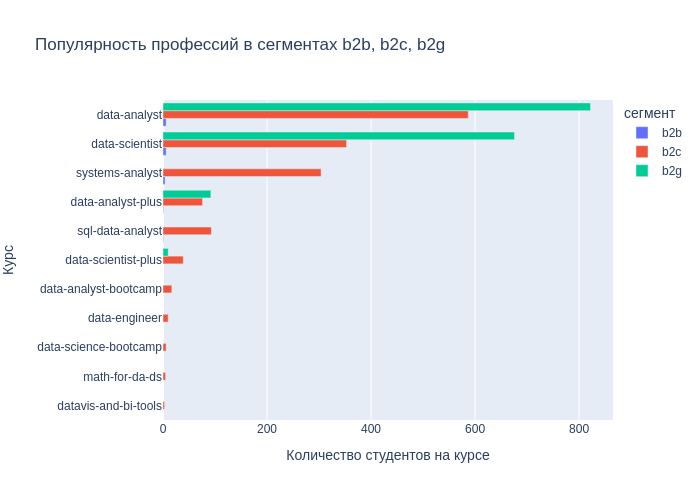

In [82]:
# визуализируем
fig = px.bar(prof_bcg, y='profession_name',  x='count', color="current_segment", barmode='group', labels={
                     'count': 'Количество студентов на курсе', 'profession_name': 'Курс', 'current_segment': 'сегмент'
                     }, title='Популярность профессий в сегментах b2b, b2c, b2g')\
        .update_yaxes(categoryorder='total ascending')
fig.show()

In [83]:
fig.write_image("prof.svg")

**Какие выводы можно сделать по популярности профессий в разрезе по всем сегментам:**
* Самыми популярными являются курсы Data Analyst, Data Scientist.
* Среди сегмента b2c также популярен курс System Analyst.
* В сегменте b2g представлены только 4 курса: Data Analyst, Data Scientist, Data Analyst Plus, Data Scientist Plus. Это связано с тем, что обучение по государственной программе вкючает в себя не все курсы Яндекс Практикума, а только строго-определенный перечень.
* Данные по сегменту b2b максимально скромные, поэтому в разбивке по всем сегментам эту группу студентов почти не видно. Это может быть связано с тем, что студенты этого сегмента не заинтересованы в трудоустройстве, т.к. их обучение оплачивает компания-работодатель.

**Рассмотрим отдельно b2b, чтобы иметь более полное представление об этом сегменте**

In [84]:
b2b_prof = b2b.groupby('profession_name')\
              .agg({'profession_name':'count'})\
              .rename(columns={'profession_name': 'count'})\
              .sort_values(by='count', ascending=False)\
              .reset_index()
b2b_prof

,profession_name,count
0,data-scientist,66
1,data-analyst,54
2,systems-analyst,28
3,data-analyst-plus,9
4,sql-data-analyst,2


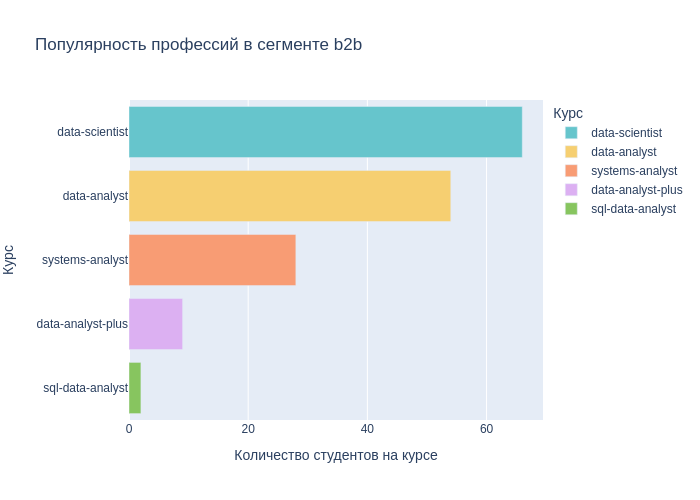

In [85]:
fig = px.bar(b2b_prof, x='count', y='profession_name', title='Популярность профессий в сегменте b2b',\
             labels={'count': 'Количество студентов на курсе', 'profession_name': 'Курс'}, color='profession_name',\
             color_discrete_sequence=px.colors.qualitative.Pastel)\
             .update_yaxes(categoryorder='total ascending')
fig.show()

**Вывод:**
* Если в b2c и b2g преобладают студенты, обучающиеся на курсе Data Analyst, то среди студентов b2b сегмента, которые  обучаются за счет бизнеса (компании-работодателя), преобладает курс **Data Science**. Далее идут курсы Data Analyst и Systems Analyst, и совсем небольшое количество студентов – на Data Analyst Plus и SQL Data Analyst.

**В разрере сегментов посмотрим ответы студентов на вопрос о цели обучения**

In [86]:
# в отдельный датасэт сгруппируем заведения по категориям
learning_target = df.groupby('current_segment')\
                    .agg({'work':'sum', 'development':'sum','salary':'sum', 'career':'sum', 'no_target':'sum', 'business':'sum'})\
                    .reset_index()
learning_target

,current_segment,work,development,salary,career,no_target,business
0,b2b,57,28,37,25,0,0
1,b2c,9319,1558,1474,780,257,0
2,b2g,14212,1751,1623,894,266,0


In [87]:
# для построения визуализации удалим столбец с сегментами
learning_target = learning_target.drop(columns='current_segment')
learning_target

,work,development,salary,career,no_target,business
0,57,28,37,25,0,0
1,9319,1558,1474,780,257,0
2,14212,1751,1623,894,266,0


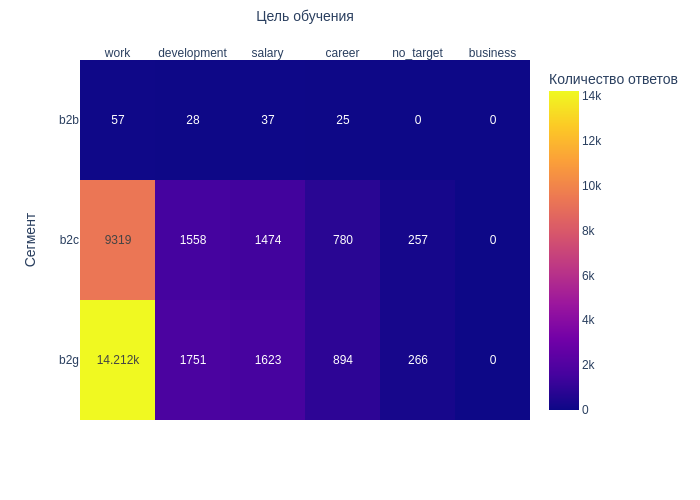

In [88]:
# строим хитмэп
fig = px.imshow(learning_target,
                labels=dict(x="Цель обучения", y="Сегмент", color="Количество ответов"),
                x=['work', 'development', 'salary', 'career', 'no_target', 'business'],
                y=['b2b', 'b2c', 'b2g'],
                text_auto=True, aspect="auto"
               )
fig.update_xaxes(side="top")
fig.show()

**Вывод:**
* Во всех сегментах преобладает цель обучения – **Смена работы**.
* Далее по популярности идут такие цели, как получение новых навыков для общего развития и получение новых знаний, чтобы повысить зарплату.
* Цель "Развитие бизнеса" не ставят ни в одном из сегментов.

В целом поведение пользователей достаточно схоже в рамках исследования целей обучения.

**Исследуем корреляции – узнаем, влияют ли цели обучения друг на друга**

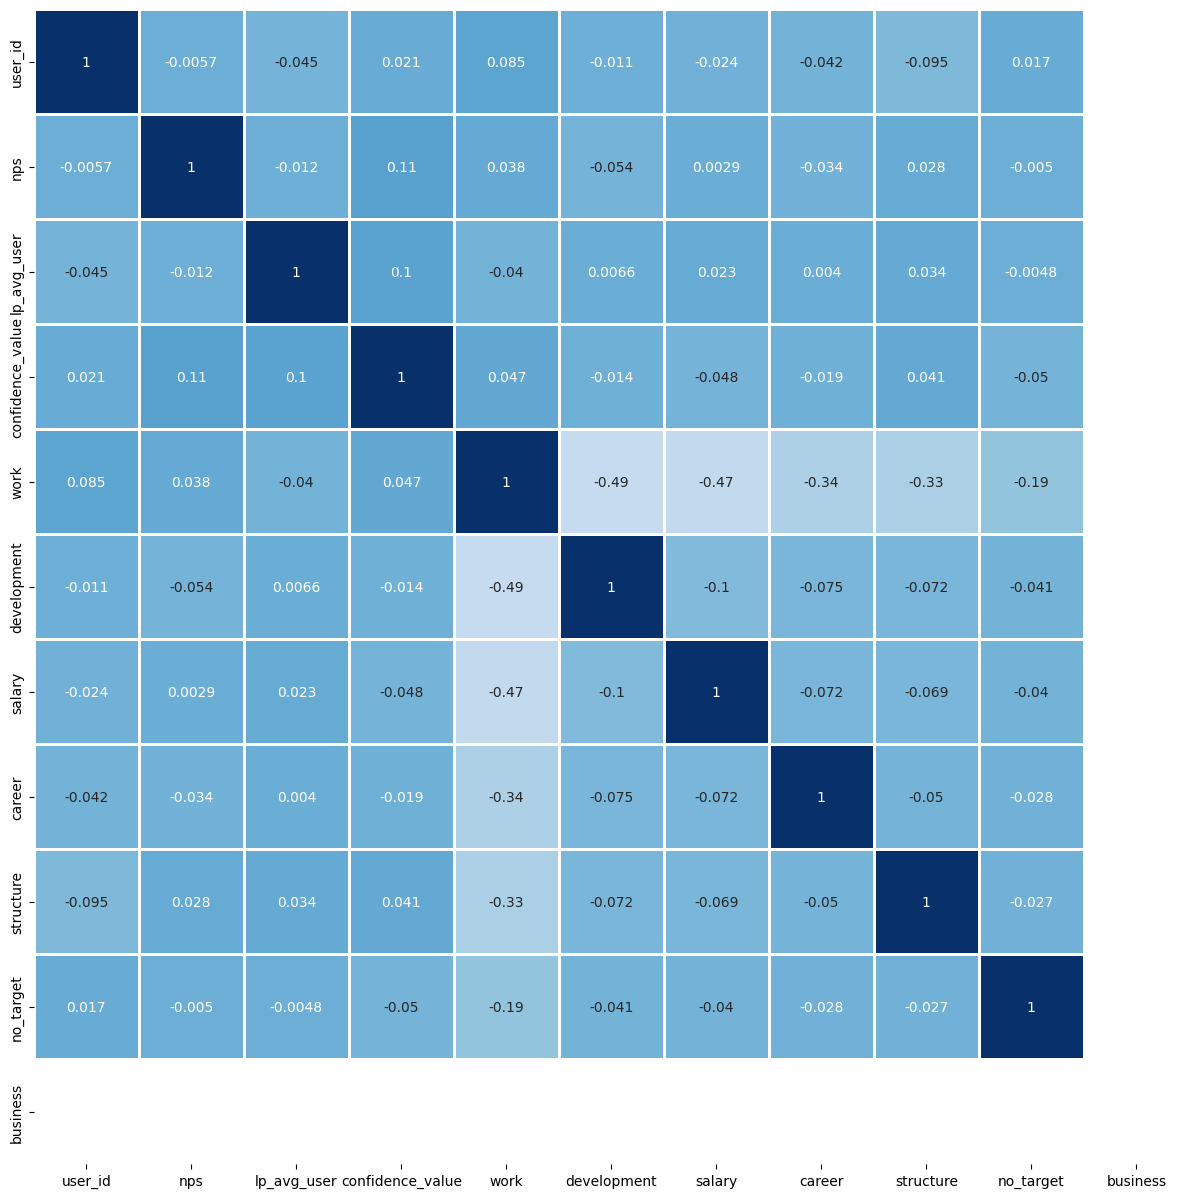

In [89]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidth=2, square=True, cbar=False, vmin=-.5, center=0);

**Вывод** \
Заметны корреляции между ***сменой работы*** и такими целями, как:
* получить новые навыки для общего развития.
* получить новые знания, чтобы повысить зарплату.
* продвинуться по карьерной лестнице.
* структурировать уже полученные навыки и знания.

**Посмотрим корреляцию сегментов со средней успеваемостью – lp_avg_user. Узнаем, есть ли разница в обучении тех, кто учился по государственной программе, и тех, кто оплачивал обучение сам**

In [90]:
# соберем в табличку юзеров по b2c и b2g сегаментам и их среднюю успеваемость
lp_avg_user_corr = df[df['current_segment'] != 'b2b'].groupby(['current_segment', 'user_id'])['lp_avg_user'].mean().to_frame().reset_index()
lp_avg_user_corr.columns = ['current_segment', 'user_id', 'lp_avg_user']
lp_avg_user_corr

,current_segment,user_id,lp_avg_user
0,b2c,8199,0.711000
1,b2c,8215,0.611667
2,b2c,15700,0.860000
3,b2c,16053,0.665556
4,b2c,18494,0.861000
...,...,...,...
3084,b2g,15496690,0.570000
3085,b2g,15508727,0.410000
3086,b2g,15519987,0.606667
3087,b2g,15524841,0.430000


Построим графики для наглядного представления распределения оценок внутри сегментов b2c и b2g

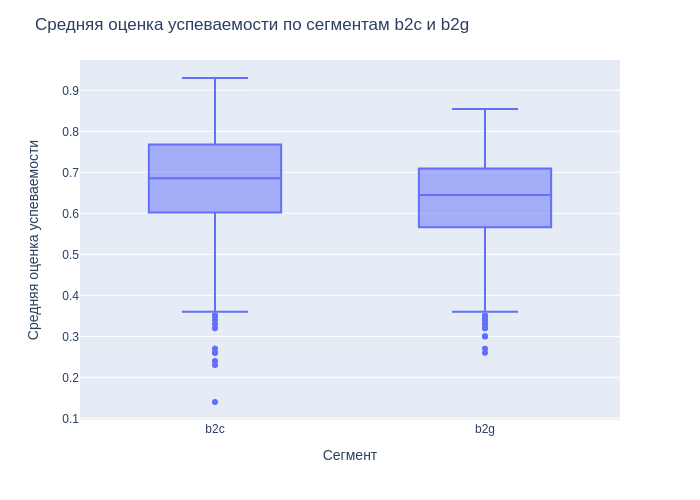

In [91]:
# делаем визуализацию
fig = px.box(lp_avg_user_corr, x="current_segment", y="lp_avg_user")
fig.update_layout(
    title='Средняя оценка успеваемости по сегментам b2c и b2g',
    xaxis_title='Сегмент',
    yaxis_title='Средняя оценка успеваемости'
)
fig.show()

**Вывод:**
* Успеваемость сегмента b2c, кто сам оплатил обучение, не многим выше, чем у сегмента b2g, кто учится по государственной программе.
* Медианная оценка у b2c – 0.69, а у b2g – 0.65.
* Максимальная оценка у b2c – 0.93, а у b2g – 0.85.
* Минимальная оценка (в рамках нормальных значений, без выбросов) одинаковая у обоих сегментов – 0.36.

**Исследуем отдельно столбец nps (вероятность, что студент порекомендует курс)**


In [92]:
# в отдельный датафрейм соберем всех юзеров, которые давали ответ на этот вопрос
# для этого отберем все строки, где нет маркера "-1", который мы устанавливали для отслеживания строк с пропусками
nps = df[df['nps'] != -1]

In [93]:
nps.head(1)

,user_id,nps,lp_avg_user,confidence_value,cohort,current_cohort,current_segment,original_segment,profession_name,q1,q2,q3,q4,q5,q6,work,development,salary,career,structure,no_target,business
330,15051752,10.0,0.6125,1.833333,ds_cohort_107,ds_cohort_107,b2g,b2g,data-scientist,устройство рынка труда персональная карьерная ...,Хочется плавно войти в новую профессию не теря...,Получить новые навыки для общего развития.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома",0,1,0,0,0,0,0


In [94]:
nps_value = nps.groupby('nps')\
              .agg({'user_id':'count'})\
              .rename(columns={'user_id': 'count'})\
              .sort_values(by='nps')\
              .reset_index()
nps_value['share'] = (nps_value['count']/nps['user_id'].count())*100
nps_value

,nps,count,share
0,0.0,44,0.655249
1,1.0,12,0.178704
2,2.0,54,0.804170
3,3.0,63,0.938198
4,4.0,130,1.935964
5,5.0,396,5.897245
6,6.0,309,4.601638
7,7.0,732,10.900968
8,8.0,1265,18.838421
9,9.0,852,12.688012


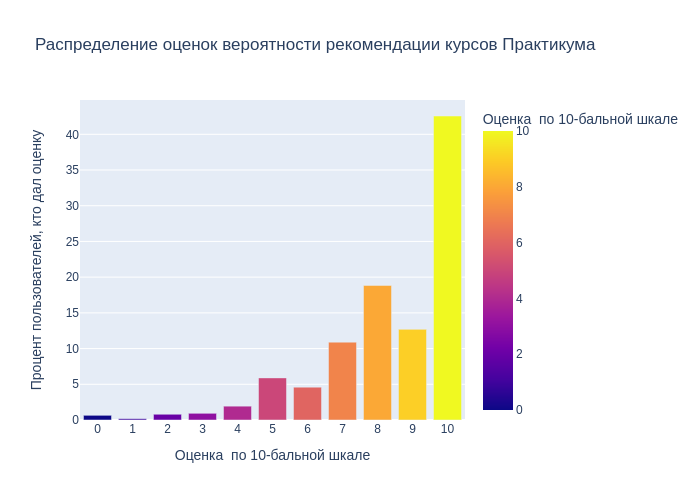

In [95]:
fig = px.bar(nps_value, x='nps', y='share', title='Распределение оценок вероятности рекомендации курсов Практикума',\
             labels={'share': 'Процент пользователей, кто дал оценку', 'nps': 'Оценка  по 10-бальной шкале'}, color='nps')

fig.update_layout(xaxis=dict(
    tickmode='array',
    tickvals=nps_value['nps']
))

fig.show()

In [96]:
# количество уникальных юзеров, которые дали ответ на этот вопрос
nps_users = nps['user_id'].nunique()

# количество уникальных юзеров всего
df_users = df['user_id'].nunique()

In [97]:
print("Доля тех, кто не давал ответ на вопрос про рекомендацию курса:", round(((df_users - nps_users)/df_users)*100), '%')

Доля тех, кто не давал ответ на вопрос про рекомендацию курса: 83 %


In [98]:
# посчитаем количество промоутеров
promo = nps[(nps['nps'] == 10) | (nps['nps'] == 9)]['user_id'].count()

In [99]:
# посчитаем количество критиков
critics = nps[(nps['nps'] == 0) | (nps['nps'] == 1) | (nps['nps'] == 2) | (nps['nps'] == 3) | (nps['nps'] == 4) | (nps['nps'] == 5) | (nps['nps'] == 6)]['user_id'].count()

In [100]:
 nps_metric = ((promo / nps['user_id'].count())*100) - ((critics / nps['user_id'].count())*100)
 nps_metric

40.23827252419955

По нашим данным NPS равен 40%.

Но надо иметь в виду, что всего 17% из всей выборки дали ответ на вопрос про рекомендацию курса. Мы не сможем сделать объективных выводов по этим ответам, так как выборка нерепрезентативна.

**Исследуем столбец q1**

Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции:
1. резюме
2. оформление портфолио
3. прохождение собеседований
4. решение тестовых заданий
5. сопроводительное письмо
6. определение стратегии поиска работы
7. оценка шансов на трудоустройство
8. персональная карьерная консультация
9. устройство рынка труда
10. как и куда можно расти как специалисту
11. определение профессиональной сферы
12. как говорить про повышение
13. не думаю, что вы можете мне с чем-то помочь

In [101]:
# в отдельный датафрейм соберем все ответы на вопрос q1
first_answer = filtered_answers[filtered_answers['question_title'] == 'q1']
first_answer.head()

,user_id,answer_date,answer_id,cohort,current_cohort,current_segment,original_segment,profession_name,question_title,question_type,user_answer
1,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,q1,checkbox,определение профессиональной сферы
4,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,q1,checkbox,персональная карьерная консультация
5,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,q1,checkbox,устройство рынка труда
6,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,q1,checkbox,как и куда можно расти как специалисту
8,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,q1,checkbox,сопроводительное письмо


In [102]:
# добавляем новые столбцы
first_answer['cv'] = 0
first_answer['portfolio'] = 0
first_answer['interview'] = 0
first_answer['test_tasks'] = 0
first_answer['cover_letter'] = 0
first_answer['strategy'] = 0
first_answer['job_evaluation'] = 0
first_answer['career_advice'] = 0
first_answer['market_structure'] = 0
first_answer['specialist_growth'] = 0
first_answer['professional_sphere'] = 0
first_answer['promotion'] = 0
first_answer['no_help'] = 0

# заполняем столбцы значениями 0 и 1 в соответствии с ответами на вопрос q3
first_answer.loc[first_answer['user_answer'] == 'резюме', 'cv'] = 1
first_answer.loc[first_answer['user_answer'] == 'оформление портфолио', 'portfolio'] = 1
first_answer.loc[first_answer['user_answer'] == 'прохождение собеседований', 'interview'] = 1
first_answer.loc[first_answer['user_answer'] == 'решение тестовых заданий', 'test_tasks'] = 1
first_answer.loc[first_answer['user_answer'] == 'сопроводительное письмо', 'cover_letter'] = 1
first_answer.loc[first_answer['user_answer'] == 'определение стратегии поиска работы', 'strategy'] = 1
first_answer.loc[first_answer['user_answer'] == 'оценка шансов на трудоустройство', 'job_evaluation'] = 1
first_answer.loc[first_answer['user_answer'] == 'персональная карьерная консультация', 'career_advice'] = 1
first_answer.loc[first_answer['user_answer'] == 'устройство рынка труда', 'market_structure'] = 1
first_answer.loc[first_answer['user_answer'] == 'как и куда можно расти как специалисту', 'specialist_growth'] = 1
first_answer.loc[first_answer['user_answer'] == 'определение профессиональной сферы', 'professional_sphere'] = 1
first_answer.loc[first_answer['user_answer'] == 'как говорить про повышение', 'promotion'] = 1
first_answer.loc[first_answer['user_answer'] == 'не думаю, что вы можете мне с чем-то помочь', 'no_help'] = 1

In [103]:
first_answer.head()

,user_id,answer_date,answer_id,cohort,current_cohort,current_segment,original_segment,profession_name,question_title,question_type,user_answer,cv,portfolio,interview,test_tasks,cover_letter,strategy,job_evaluation,career_advice,market_structure,specialist_growth,professional_sphere,promotion,no_help
1,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,q1,checkbox,определение профессиональной сферы,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,q1,checkbox,персональная карьерная консультация,0,0,0,0,0,0,0,1,0,0,0,0,0
5,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,q1,checkbox,устройство рынка труда,0,0,0,0,0,0,0,0,1,0,0,0,0
6,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,q1,checkbox,как и куда можно расти как специалисту,0,0,0,0,0,0,0,0,0,1,0,0,0
8,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,q1,checkbox,сопроводительное письмо,0,0,0,0,1,0,0,0,0,0,0,0,0


In [104]:
# в отдельный датасэт сгруппируем ответы по сегментам
help = first_answer.groupby('current_segment')\
                    .agg({'cv':'sum', 'portfolio':'sum','interview':'sum', 'test_tasks':'sum', 'cover_letter':'sum', 'strategy':'sum',
                          'job_evaluation':'sum', 'career_advice':'sum','market_structure':'sum', 'specialist_growth':'sum', 'professional_sphere':'sum',
                          'promotion':'sum', 'no_help':'sum'})\
                    .reset_index()
help

,current_segment,cv,portfolio,interview,test_tasks,cover_letter,strategy,job_evaluation,career_advice,market_structure,specialist_growth,professional_sphere,promotion,no_help
0,b2b,9,12,11,9,5,8,12,12,10,10,5,9,2
1,b2c,1342,1273,1265,1167,1203,1123,1101,940,839,837,753,606,114
2,b2g,1328,1310,1302,1253,1218,1173,1128,994,893,878,894,615,73


In [105]:
# для построения визуализации удалим столбец с сегментами
help = help.drop(columns='current_segment')

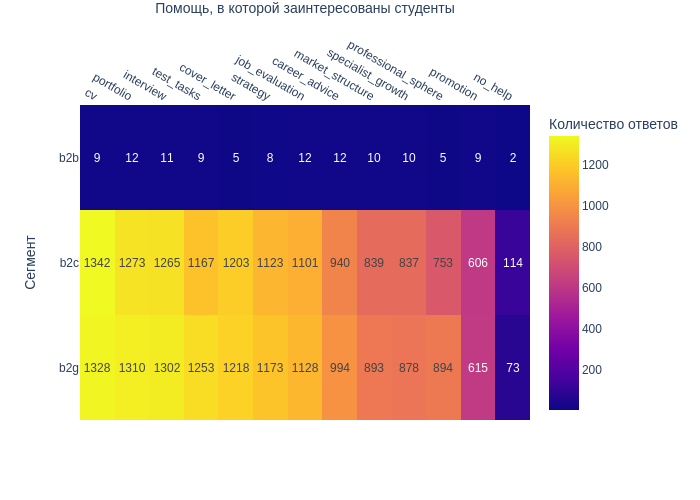

In [106]:
# строим хитмэп
fig = px.imshow(help,
                labels=dict(x="Помощь, в которой заинтересованы студенты", y="Сегмент", color="Количество ответов"),
                x=['cv', 'portfolio', 'interview', 'test_tasks', 'cover_letter', 'strategy', 'job_evaluation', 'career_advice', 'market_structure',
                   'specialist_growth', 'professional_sphere', 'promotion', 'no_help'],
                y=['b2b', 'b2c', 'b2g'],
                text_auto=True, aspect="auto"
               )

fig.update_xaxes(side="top")
fig.show()

**Вывод:**
* В сегментах b2c и b2g преобладает потребность в помощи с ***резюме, оформлением портфолио, прохождением собеседований***. Меньше всего в этих сегментах интересуются тем, ***как говорить про повышение***.
* В сегменте b2b студентам интересна в основном помощь в ***оформлении портфолио, оценке шансов на трудоустройство, персональной карьерной консультации***.
* Во всех сегментах студенты считают, что программа Практикума им может помочь в достижении целей, так как только небольшое количество человек ответили – *не думаю, что вы можете мне с чем-то помочь*.

**Исследуем столбец q5**

В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда:

* 'Нет опыта работы в IT и в направлении Анализа данных.'
* 'Менее года опыта работы в направлении Анализа данных.'
* 'От 1 до 3 лет опыта работы направлении Анализа данных.'
* 'Более 3 лет опыта работы в направлении Анализа данных.'
* 'Менее 1 года опыта работы в другом направлении IT.'
* 'От 1 года опыта работы в другом направлении IT.'

In [107]:
pivot_table.head()

question_title,user_id,cohort,current_cohort,current_segment,original_segment,profession_name,q1,q2,q3,q4,q5,q6
0,3157,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,определение профессиональной сферы персональна...,Все ок),Продвинуться по карьерной лестнице.,Да,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома"
1,5415,data_cohort_117,data_cohort_119,b2g,b2g,data-analyst,оценка шансов на трудоустройство устройство ры...,,Сменить работу.,Нет,От 1 года опыта работы в другом направлении IT.,"Да, планирую записаться после диплома"
2,8199,data_cohort_103,data_cohort_103,b2c,b2c,data-analyst,определение стратегии поиска работы персональн...,-,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, уже записался"
3,8215,ds_cohort_101,ds_cohort_101,b2c,b2c,data-scientist,как говорить про повышение решение тестовых за...,Чувствую себя неуверенно во многих вопросах. П...,Сменить работу.,Нет,Нет опыта работы в IT и в направлении Анализа ...,"Да, планирую записаться после диплома"
4,10202,data_analyst_plus_cohort_31,data_analyst_plus_cohort_31,b2g,b2g,data-analyst-plus,оформление портфолио сопроводительное письмо к...,Спасибо,Развить свой бизнес.,Нет,Более 3 лет опыта работы в направлении Анализа...,"Да, уже записался"


In [108]:
# сделаем из уникальных ответов список
unique_answers = pivot_table['q5'].unique().tolist()
unique_answers

['Нет опыта работы в IT и в направлении Анализа данных.',
 'От 1 года опыта работы в другом направлении IT.',
 'Более 3 лет опыта работы в направлении Анализа данных.',
 'От 1 до 3 лет опыта работы направлении Анализа данных.',
 'Менее 1 года опыта работы в другом направлении IT.',
 'Менее года опыта работы в направлении Анализа данных.']

In [109]:
# создаем словарь из вопросов для замены и для каждого вопроса ставим вариант вопроса на который его надо заменить
answers_change_dict = {}

In [110]:
# делаем словарь
for idx, answer in enumerate(unique_answers):
    answers_change_dict[answer] = 'a' + str(idx + 1) # нумерация идет с нуля - добавляем один (или не добавляем - как удобнее, я по вашему проекту иду)

answers_change_dict

{'Нет опыта работы в IT и в направлении Анализа данных.': 'a1',
 'От 1 года опыта работы в другом направлении IT.': 'a2',
 'Более 3 лет опыта работы в направлении Анализа данных.': 'a3',
 'От 1 до 3 лет опыта работы направлении Анализа данных.': 'a4',
 'Менее 1 года опыта работы в другом направлении IT.': 'a5',
 'Менее года опыта работы в направлении Анализа данных.': 'a6'}

In [111]:
# делаем замену по словарю и смотрим что получилось
pivot_table['q5'] = pivot_table['q5'].map(answers_change_dict)

pivot_table.head()

question_title,user_id,cohort,current_cohort,current_segment,original_segment,profession_name,q1,q2,q3,q4,q5,q6
0,3157,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,определение профессиональной сферы персональна...,Все ок),Продвинуться по карьерной лестнице.,Да,a1,"Да, планирую записаться после диплома"
1,5415,data_cohort_117,data_cohort_119,b2g,b2g,data-analyst,оценка шансов на трудоустройство устройство ры...,,Сменить работу.,Нет,a2,"Да, планирую записаться после диплома"
2,8199,data_cohort_103,data_cohort_103,b2c,b2c,data-analyst,определение стратегии поиска работы персональн...,-,Сменить работу.,Нет,a1,"Да, уже записался"
3,8215,ds_cohort_101,ds_cohort_101,b2c,b2c,data-scientist,как говорить про повышение решение тестовых за...,Чувствую себя неуверенно во многих вопросах. П...,Сменить работу.,Нет,a1,"Да, планирую записаться после диплома"
4,10202,data_analyst_plus_cohort_31,data_analyst_plus_cohort_31,b2g,b2g,data-analyst-plus,оформление портфолио сопроводительное письмо к...,Спасибо,Развить свой бизнес.,Нет,a3,"Да, уже записался"


In [112]:
# для удобства далее будем работать с таблицей experience - опыт
experience = pivot_table.copy()

* 'Нет опыта работы в IT и в направлении Анализа данных.' –'a1' = no_it_no_da
* 'От 1 года опыта работы в другом направлении IT.'–'a2' = from_1_year_it
* 'Более 3 лет опыта работы в направлении Анализа данных.' – 'a3' = more_3_years_da
* 'От 1 до 3 лет опыта работы направлении Анализа данных.'– 'a4' = 1_to_3_years_da
* 'Менее 1 года опыта работы в другом направлении IT.' – 'a5' = less_1_year_it
* 'Менее года опыта работы в направлении Анализа данных.' – 'a6' = less_1_year_da

In [113]:
experience['no_it_no_da'] = 0
experience['from_1_year_it'] = 0
experience['more_3_years_da'] = 0
experience['1_to_3_years_da'] = 0
experience['less_1_year_it'] = 0
experience['less_1_year_da'] = 0

# заполняем столбцы значениями 0 и 1 в соответствии с ответами на вопрос q5
experience.loc[experience['q5'] == 'a1', 'no_it_no_da'] = 1
experience.loc[experience['q5'] == 'a2', 'from_1_year_it'] = 1
experience.loc[experience['q5'] == 'a3', 'more_3_years_da'] = 1
experience.loc[experience['q5'] == 'a4', '1_to_3_years_da'] = 1
experience.loc[experience['q5'] == 'a5', 'less_1_year_it'] = 1
experience.loc[experience['q5'] == 'a6', 'less_1_year_da'] = 1

In [114]:
experience.head()

question_title,user_id,cohort,current_cohort,current_segment,original_segment,profession_name,q1,q2,q3,q4,q5,q6,no_it_no_da,from_1_year_it,more_3_years_da,1_to_3_years_da,less_1_year_it,less_1_year_da
0,3157,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,определение профессиональной сферы персональна...,Все ок),Продвинуться по карьерной лестнице.,Да,a1,"Да, планирую записаться после диплома",1,0,0,0,0,0
1,5415,data_cohort_117,data_cohort_119,b2g,b2g,data-analyst,оценка шансов на трудоустройство устройство ры...,,Сменить работу.,Нет,a2,"Да, планирую записаться после диплома",0,1,0,0,0,0
2,8199,data_cohort_103,data_cohort_103,b2c,b2c,data-analyst,определение стратегии поиска работы персональн...,-,Сменить работу.,Нет,a1,"Да, уже записался",1,0,0,0,0,0
3,8215,ds_cohort_101,ds_cohort_101,b2c,b2c,data-scientist,как говорить про повышение решение тестовых за...,Чувствую себя неуверенно во многих вопросах. П...,Сменить работу.,Нет,a1,"Да, планирую записаться после диплома",1,0,0,0,0,0
4,10202,data_analyst_plus_cohort_31,data_analyst_plus_cohort_31,b2g,b2g,data-analyst-plus,оформление портфолио сопроводительное письмо к...,Спасибо,Развить свой бизнес.,Нет,a3,"Да, уже записался",0,0,1,0,0,0


In [115]:
# в отдельный датасэт сгруппируем ответы по сегментам
experience = experience.groupby('current_segment')\
                       .agg({'no_it_no_da':'sum', 'from_1_year_it':'sum', 'more_3_years_da':'sum', '1_to_3_years_da':'sum', 'less_1_year_it':'sum', 'less_1_year_da':'sum'})\
                       .reset_index()
experience

question_title,current_segment,no_it_no_da,from_1_year_it,more_3_years_da,1_to_3_years_da,less_1_year_it,less_1_year_da
0,b2b,10,7,3,3,0,2
1,b2c,1092,284,125,162,62,100
2,b2g,1238,202,53,59,79,51


In [116]:
experience = experience.drop(columns='current_segment')

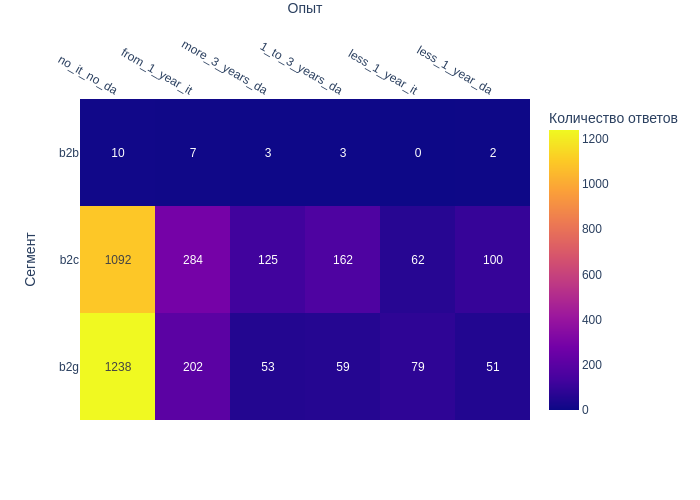

In [117]:
# строим хитмэп
fig = px.imshow(experience,
                labels=dict(x="Опыт", y="Сегмент", color="Количество ответов"),
                x=['no_it_no_da', 'from_1_year_it', 'more_3_years_da', '1_to_3_years_da', 'less_1_year_it', 'less_1_year_da'],
                y=['b2b', 'b2c', 'b2g'],
                text_auto=True, aspect="auto"
               )
fig.update_xaxes(side="top")
fig.show()

**Вывод:**
1. Во всех сегментах большинство студентов ***не имеют опыта работы ни в IT, ни в Анализе данных***.
2. В сегменте b2c, в отличии от других сегментов, больше студентов с опытом в IT или Анализе данных: от 1 года в IT, от 1 до 3 лет в Аналитике данных, больше 3 лет в Аналитике данных.
3. В сегменте b2b мало данных, они могут не отражать реальной картины.

## Портреты пользователей

Мы разделили пользователей на 3 сегмента: b2b, b2c, b2g. Опишем каждую группу.

**b2c – студент, который сам является клиентом**

1. **Успеваемость**

Успеваемость чуть выше, чем у сегмента b2g, кто учится по государственной программе.Медианная оценка – 0.69, максимальная – 0.93, а минимальная (в рамках нормальных значений, без выбросов) – 0.36.

Хорошая успеваемость связана с тем, что студенты осознают свою мотивацию окончить обучение, как минимум в том, что они оплачивают курс сами.

2. **Основная цель обучения**

Преобладает цель обучения – Смена работы. Далее по популярности идут такие цели, как получение новых навыков для общего развития и получение новых знаний, чтобы повысить зарплату.

3. **Профессии**

Спектр выбора курсов представлен 11 разными профессиями. Самыми популярными являются курсы Data Analyst, Data Scientist. Также популярен курс System Analyst.

4. **В какой помощи заинтересованы**

Преобладает потребность в помощи с резюме, оформлением портфолио, прохождением собеседований. Меньше всего в этих сегментах интересуются тем, как говорить про повышение.

5. **Опыт работы**

Большинство студентов не имеют опыта работы ни в IT, ни в Анализе данных.
В сравнении с другими сегментами, здесь больше студентов с опытом в IT или Анализе данных: от 1 года в IT, от 1 до 3 лет в Аналитике данных, больше 3 лет в Аналитике данных.

**b2g – студент, чьё обучение оплачивается государством**

1. **Успеваемость:**

Успеваемость примерно на уровне тех, кто оплатил обучение сам. Медианная оценка – 0.65, максимальная оценка – 0.85, минимальная оценка (в рамках нормальных значений, без выбросов) – 0.36.

На обучение по государственной программе идет более строгий отбор, так как государство заинтересовано в том, чтобы обучение проходили более замотивированные ребята. Поэтому успеваемость в данном сегменте хорошая.

2. **Основная цель обучения**

Преобладает цель обучения – Смена работы. Далее по популярности идут такие цели, как получение новых навыков для общего развития и получение новых знаний, чтобы повысить зарплату.

3. **Профессии**

В сегменте представлены только 4 курса: Data Analyst, Data Scientist, Data Analyst Plus, Data Scientist Plus. Это связано с тем, что обучение по государственной программе вкючает в себя не все курсы Яндекс Практикума, а только строго-определенный перечень.

4. **В какой помощи заинтересованы**

Преобладает потребность в помощи с резюме, оформлением портфолио, прохождением собеседований. Меньше всего в этих сегментах интересуются тем, как говорить про повышение.

5. **Опыт работы**

Большинство студентов не имеют опыта работы ни в IT, ни в Анализе данных. Совсем небольшая доля тех, кто имеет хотя бы какой-то опыт.

**b2b – студент, чьё обучение оплачивается бизнесом**

Данные по сегменту максимально скромные. Это может быть связано с тем, что студенты этого сегмента не заинтересованы в трудоустройстве, т.к. их обучение оплачивает компания-работодатель.

1. **Успеваемость**

Успеваемость студентов не была рассмотрена из-за нерепрезентативного количества данных.

2. **Основная цель обучения**

Преобладает цель обучения – Смена работы. Далее по популярности идут такие цели, как получение новых навыков для общего развития и получение новых знаний, чтобы повысить зарплату.

3. **Профессии**

Преобладает курс Data Science. Далее идут курсы Data Analyst и Systems Analyst, и совсем небольшое количество студентов – на Data Analyst Plus и SQL Data Analyst.

4. **В какой помощи заинтересованы**

В сегменте b2b студентам интересна в основном помощь в оформлении портфолио, оценке шансов на трудоустройство, персональной карьерной консультации.

5. **Опыт работы**

Данные не репрезентативны.

## Гипотезы и рекомендации бизнесу

**Гипотеза 1** \

H0: заинтересованность студентов b2c и b2g сегментов в смене работы не отличается \
H1: заинтересованность студентов b2c и b2g сегментов в смене работы отличается

**Гипотеза 2** \

Н0: средний lp студентов b2c и b2g не отличается \
H1: средний lp студентов b2c и b2g отличаются

**Гипотеза 3** \

Н0: студенты b2b и b2c сегмента одинаково заинтересованы в персональной карьерной консультации \
H1: заинтересованность в персональной карьерной консультации отличается у сегментов b2b и b2c

## Общие выводы

Целью нашего исследования было вынести гипотезы – **как программа обучения может помочь студентам в достижении их целей**.

На основе проведенного нами исследования, мы определили:

1. Основная цель большинства студентов – **смена работы**. Студенты b2c и b2g больше заинтересованы в **составлении резюме, портфолио, написании сопроводительных писем**, а b2b – в **повышении** и **карьерной консультации**.

2. В b2c и b2g преобладают студенты, обучающиеся на курсе **Data Analyst**, а среди студентов b2b сегмента большим спросом пользуется курс **Data Science**.

3. Во всех сегментах большинство студентов **не имеют опыта работы ни в IT, ни в Анализе данных**. В сегменте b2c, в отличии от других сегментов, больше студентов с опытом в IT или Анализе данных: от 1 года в IT, от 1 до 3 лет в Аналитике данных, больше 3 лет в Аналитике данных.

4. Успеваемость сегмента b2c, кто сам оплатил обучение, не многим выше, чем у сегмента b2g, кто учится по государственной программе.

5. Индекс потребительской лояльности:  **NPS = 40%**. Но надо иметь в виду, что всего 17% из всей выборки дали ответ на вопрос про рекомендацию курса. Сейчас мы не сможем сделать объективных выводов по этим ответам, так как данные не репрезентативны, но это было бы полезно рассмотреть дополнительно. Так же, как и сегмент b2b можно было бы рассмотреть подробнее, так как на момент исследования мы не обладали достаточным количеством данных.

## Рекомендации бизнесу

1. Около 70% студентов в каждом из сегментов в основном заинтересованы в смене работы.

→ **Сфокусироваться на основной цели студентов и усилить направление по трудоустройству.**

2. В ходе исследования мы выяснили, что успеваемость студентов b2c сегмента немного выше, чем у студентов b2g.

→ **Исследовать и разработать варианты мотивации студентов в зависимости от сегментов.**

3. Исследование показало, что в b2c сегменте студенты в большей мере заинтересованы в составлении резюме, оформлением портфолио, прохождением собеседований. И меньше всего интересуются тем, как говорить про повышение. А в b2b сегменте – в оценке шансов на трудоустройство, персональной карьерной консультации.

→ **Продолжить исследовать потребности студентов в карьерном треке, улучшить помощь в зависимости от запросов и опыта работы по специальности.**

**Ожидаемый результат:** помощь в достижении цели студентов по смене работы → увеличение лояльности к бизнесу → увеличение числа рекомендаций курсов Практикума → увеличение дохода бизнеса.